## Part A

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# reading the data
LINTHAL = pd.read_csv("c:/Drive_d/Applied Stats/project/LINTHALL.txt", sep='\s+')
    

# now defining variables
Y_linth = LINTHAL['BIO']
X_linth = LINTHAL[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]

# constant term added to predictors
X_linth = sm.add_constant(X_linth)

# Fitting OLS model
ols_model = sm.OLS(Y_linth,X_linth).fit()


# summary
print(ols_model.summary())





                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     9.270
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           4.03e-07
Time:                        05:49:14   Log-Likelihood:                -302.70
No. Observations:                  43   AIC:                             635.4
Df Residuals:                      28   BIC:                             661.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3475.9507   3441.050      1.010      0.3

## Colliniearity Diagnostics
#### VIF

In [2]:
vif_frame = pd.DataFrame()
vif_frame["Predictors"] = X_linth.columns #dropping constatnt term
vif_frame["Varince Inflation Factor"] = [variance_inflation_factor(X_linth.values, i) for i in range(X_linth.shape[1])]

# Printing VIF Results

print("VIF for different Predictors")
print(vif_frame)

VIF for different Predictors
   Predictors  Varince Inflation Factor
0       const               4350.771896
1         H2S                  3.136506
2         SAL                  3.361283
3         Eh7                  1.964076
4          pH                 62.564383
5         BUF                 33.478422
6           P                  2.884226
7           K                  7.432133
8          Ca                 17.343432
9          Mg                 24.476419
10         Na                 10.372624
11         Mn                  6.737786
12         Zn                 12.391033
13         Cu                  4.866983
14        NH4                  8.586275


#### Condition indicies

In [3]:

#dropping constant trem and calculating correlation matrix
corr_matrix = X_linth.drop('const', axis=1).corr()

# Compute eigenvalues
eigen_val = np.linalg.eig(corr_matrix)[0]

# Compute condition index for each eigen value 
#storing indicies in an array

cond_inds = []

for i in range(len(eigen_val)):
    max_eigen = np.max(eigen_val)
    min_eigen = np.min(eigen_val[i])  
    
    cond_ind = np.sqrt(max_eigen / min_eigen)
    cond_inds.append(cond_ind)

cond_inds = np.sort(cond_inds)
print("\nCondition Indices \n")
print(cond_inds)



Condition Indices 

[ 1.          1.18410315  1.79147923  2.04841437  2.73362372  3.24140805
  3.69648226  4.44771993  5.68790559  6.00963282  7.84282284 10.67497074
 13.56118764 23.30839788]


### Part B

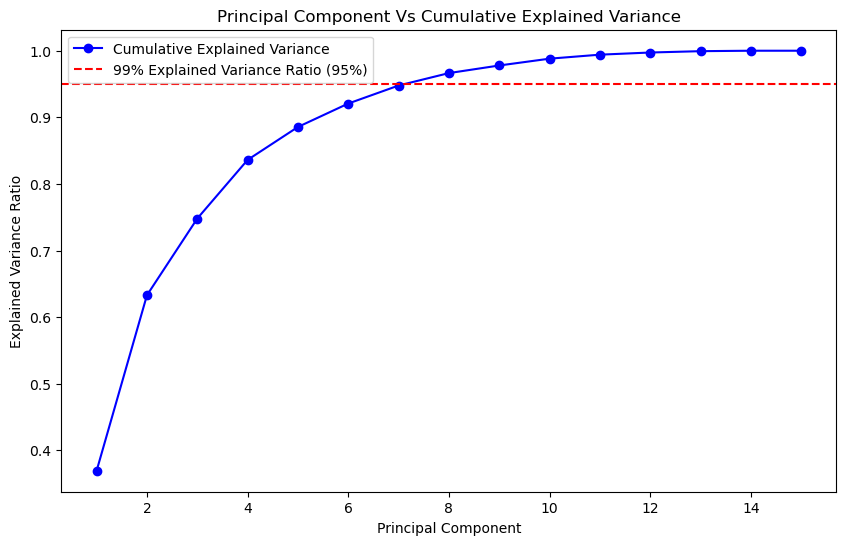

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# reading the data
LINTHAL = pd.read_csv("c:/Drive_d/Applied Stats/project/LINTHALL.txt", sep='\s+')
    

# now defining variables
Y_linth = LINTHAL['BIO']
X_linth = LINTHAL[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]

# constant term added to predictors
X_linth = sm.add_constant(X_linth)


# Normalizing the predictor variables (important for PCA)
scaler = StandardScaler()
X_normal = scaler.fit_transform(X_linth)

#Perfotming Principal Copmponenct analysis

pca = PCA()

#PCA on X
X_pca = pca.fit_transform(X_normal)

#calculating cumulative explained ratio

explained_varratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_varratio)

#deciding number of PCA components selected for variance explained at 95%

number_comp = np.argmax(cumulative_explained_var >= 0.95) + 1

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o', linestyle='-', color='blue', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label=f'99% Explained Variance Ratio (95%)')
plt.title('Principal Component Vs Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='lower right')
plt.legend()
plt.show()


In [5]:
# Print the number of selected principal components
print(f"\n Selected Principal Components: {number_comp} \n\n")


# Select only components in PCA
X_pca_selected = X_pca[:, :number_comp]

# Add a constant
X_pca_selected = sm.add_constant(X_pca_selected)

# Fit the selected components in OLS

pcr_model = sm.OLS(Y_linth, X_pca_selected).fit()

# Display PCR regression summary
print(pcr_model.summary())


# loadings from the PCA
loadings = pca.components_[:number_comp, :].T

# Extract the coefficients from the PCR model
pcr_coeff = pcr_model.params.values[1:]

# Include the intercept separately
pcr_intercept = pcr_model.params.values[0]

# Calculate the coefficients for the original variables
original_coeff = loadings @ pcr_coeff

# Add the intercept to the coefficients for the original variables
original_coeff_with_intercept = np.insert(original_coeff, 0, pcr_intercept)


# Display the coefficients for the original variables
coefficients_data = pd.DataFrame({'Variable': X_linth.columns, 'Coefficient': original_coeff})
print("\n Original coeffs for slected principal components:")
print(coefficients_data)




 Selected Principal Components: 8 


                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     12.55
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           3.58e-08
Time:                        05:49:15   Log-Likelihood:                -310.32
No. Observations:                  43   AIC:                             638.6
Df Residuals:                      34   BIC:                             654.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9

In [6]:
# Extract the standard errors of the coefficients from the PCR model
se_coefficients_ols = np.sqrt(np.diag(ols_model.cov_params()))

# Calculate the Standard Error Sum for PCR
standard_error_sum_ols = np.sum(se_coefficients_ols)


# Extract the standard errors of the coefficients from the PCR model
se_coefficients_pcr = np.sqrt(np.diag(pcr_model.cov_params()))

# Calculate the Standard Error Sum for PCR
standard_error_sum_pcr = np.sum(se_coefficients_pcr)

# Calculate the predicted values for OlS
predictions_ols = ols_model.predict(X_linth)

# Calculate the residuals for OLS
residuals_ols = Y_linth - predictions_ols

# Calculate the SSE for OLS
sse_ols = np.sum(residuals_ols**2)

# Calculate the predicted values for PCR
predictions_pcr = pcr_model.predict(X_pca_selected)

# Calculate the residuals for PCR
residuals_pcr = Y_linth - predictions_pcr

# Calculate the SSE for PCR
sse_pcr = np.sum(residuals_pcr**2)


# Compare standard error sum and SSE with Part I
print("\n ols model VS PCR:")
print("standard OLS model Standard Error Sum:", standard_error_sum_ols)
print("PCR Standard Error Sum:", standard_error_sum_pcr)
print("\n standard OLS model SSE:", sse_ols)
print("PCR SSE:",sse_pcr)


 ols model VS PCR:
standard OLS model Standard Error Sum: 4069.5785326868586
PCR Standard Error Sum: 557.1757765156334

 standard OLS model SSE: 3276740.2803900647
PCR SSE: 4671275.6145734405


## PART C

#### 1 Stepwise regression

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
Linth_5 = pd.read_csv('c:/Drive_d/Applied Stats/project/LINTH-5.txt', sep='\s+')

# Extract response variable and predictor variables
Y_linth_5 = Linth_5['BIO']
X_linth_5 = Linth_5[['SAL', 'pH', 'K', 'Na', 'Zn']]

# Adding constant term
X_linth_5 = sm.add_constant(X_linth_5)
 
# Stepwise Regression with forward steps given alph= 0.1 based on value
def stepwise_selection(X, y, alpha=0.1):
    included = []
    print("\nStepwise Regression Results:")
    
    while True:
        changed = False

        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_column = new_pval.idxmin()
        if new_pval[best_column] < alpha:
            included.append(best_column)
            print(f"Stepwise: Added {best_column}. P-value: {new_pval[best_column]:.4f}")
            changed = True


        if not changed:
            break
        
    print("\nFinal Included Variables:")
    print(included)
    return included

# Perform stepwise regression
selected_columns = stepwise_selection(X_linth_5, Y_linth_5)



Stepwise Regression Results:
Stepwise: Added const. P-value: 0.0000
Stepwise: Added pH. P-value: 0.0000
Stepwise: Added Na. P-value: 0.0142

Final Included Variables:
['const', 'pH', 'Na']


C:\Users\krish\AppData\Local\Temp\ipykernel_41132\2122704716.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\krish\AppData\Local\Temp\ipykernel_41132\2122704716.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\krish\AppData\Local\Temp\ipykernel_41132\2122704716.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\krish\AppData\Local\Temp\ipykernel_41132\2122704716.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

In [8]:
Icluded_model = sm.OLS(Y_linth_5, sm.add_constant(X_linth_5[selected_columns])).fit()

#regression fit
print(Icluded_model.summary())

# Calculate VIF for each selected column including the constant
vif_data = pd.DataFrame()
vif_data["Variable"] = sm.add_constant(X_linth_5[selected_columns]).columns
vif_data["VIF"] = [variance_inflation_factor(sm.add_constant(X_linth_5[selected_columns]).values, i) for i in range(sm.add_constant(X_linth_5[selected_columns]).shape[1])]

# Display VIF results
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.64e-10
Time:                        05:49:15   Log-Likelihood:                -317.31
No. Observations:                  43   AIC:                             640.6
Df Residuals:                      40   BIC:                             645.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.3748    279.219     -1.670      0.1

#### 2. Rridge regression

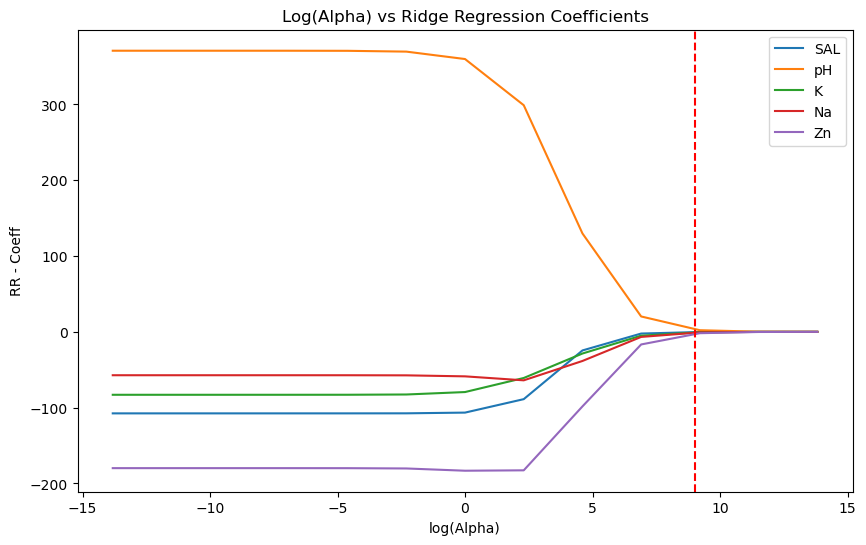

In [9]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler

# Load - data
data = pd.read_table('c:/Drive_d/Applied Stats/project/LINTH-5.txt', sep='\s+')

# Extract - response variable (Y) and predictor variables (X)
Y = data['BIO']
X_linth_5 = data[['SAL', 'pH', 'K', 'Na', 'Zn']]

# Standardize - predictors for RR
scaler = StandardScaler()
X_normalized_5 = scaler.fit_transform(X_linth_5 )

# Range of alpha values
alphas = np.logspace(-6, 6, 13)
rr_coefficients = []

# Fit - Ridge regression 
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_normalized_5, Y)
    rr_coefficients.append(ridge.coef_)

# ridge trace path
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas), rr_coefficients)
plt.title('Log(Alpha) vs Ridge Regression Coefficients')
plt.xlabel('log(Alpha)')
plt.ylabel('RR - Coeff')
plt.axvline(x=9, color='r', linestyle='--')
plt.legend(X_linth_5.columns)
plt.show()

In [10]:
# selecting log alpha 
selected_log_alpha = 9
selected_alpha = np.exp(selected_log_alpha)

# refitting the model based on obtained alpha

ridge_selected = Ridge(alpha=selected_alpha)
ridge_selected.fit(X_normalized_5, Y)

ridge_remain_variables= X_linth_5.columns[np.abs(ridge_selected.coef_) >= 1]

# Print - result
print("\n Remaining variable  after ridge trace selection ", ridge_remain_variables)

# Selecting the remaing variable in X
scaler_subset = StandardScaler()
X_subset_normalized = scaler_subset.fit_transform(X_linth_5[ridge_remain_variables])

# Model with remining variables 
ridge_rmain_model = sm.OLS(Y, sm.add_constant(X_subset_normalized)).fit()

# Collinearity diagnostics
print("\nCollinearity Diagnostics for Ridge Regression:")
print(ridge_rmain_model.summary())

# Calculate VIF for each selected column including the constant
vif_data = pd.DataFrame()
vif_data["Variable"] = ridge_remain_variables
vif_data["VIF"] = [variance_inflation_factor(X_subset_normalized, i) for i in range(X_subset_normalized.shape[1])]

# Display VIF results
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


 Remaining variable  after ridge trace selection  Index(['pH', 'Zn'], dtype='object')

Collinearity Diagnostics for Ridge Regression:
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     30.60
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           8.68e-09
Time:                        05:49:16   Log-Likelihood:                -319.92
No. Observations:                  43   AIC:                             645.8
Df Residuals:                      40   BIC:                             651.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

#### 3. BIC comparision

In [12]:
import pandas as pd
import numpy as np
from itertools import combinations
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

data = pd.read_csv('c:/Drive_d/Applied Stats/project/LINTH-5.txt', sep='\s+')

Y = data['BIO']
X_linth_5 = data[['SAL', 'pH', 'K', 'Na', 'Zn']]

# Function to calculate BIC for a given model
def calculate_bic(model, X, y):
    n = len(y)
    p = model.df_model + 1  # Add 1 for the intercept
    bic = n * np.log(np.sum((model.predict(X) - y)**2) / n) + p * np.log(n)
    return bic

# Function to calculate VIF for a given model
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Subes selection
def subset_selection(X, y, max_vars=2):
    best_bic = np.inf
    best_vif = np.inf
    best_model = None

    for k in range(1, max_vars + 1):
        # Generate k variables
        variable_combinations = list(combinations(X.columns, k))

        for variables in variable_combinations:
            # Fit a model using the selected variables
            X_subset = X[list(variables)]
            X_subset = add_constant(X_subset)
            model = OLS(y, X_subset).fit()

            # Calculate BIC for the model
            bic = calculate_bic(model, X_subset, y)
            
            # Calculate VIF for the model
            vif_values = calculate_vif(X_subset)

           #  Breaking BIC tie using VIF
            if bic < best_bic or (bic == best_bic and max(vif_values) < best_vif):
                best_bic = bic
                best_vif = max(vif_values)
                best_model = model

    return best_model

# Perform subset selection
subset_modell = subset_selection(X_linth_5, Y, max_vars=2)

print("Model selceted by subset :")
print(subset_modell.summary(), "\n")

# VIF for selected variables
vif_data_subset = calculate_vif(add_constant(X_linth_5[list(subset_modell.params.index[1:])]))

# VIF results
print("\nVariance Inflation Factor (VIF) for Selected Variables:")
print(vif_data_subset)


Model selceted by subset :
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.64e-10
Time:                        06:32:18   Log-Likelihood:                -317.31
No. Observations:                  43   AIC:                             640.6
Df Residuals:                      40   BIC:                             645.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.3748    